# DETECTING CUSTOMERS SUBSCRIPTION

## 1. DATA IMPORT

### Load libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

### Load dataset

In [17]:
dataset = pd.read_csv('input/appdata10.csv')

In [18]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


### Exploratory data analysis (EDA)

In [19]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


## 2. DATA CLEANING

### Convert column type

Let's convert 'hour' column from 'str' to 'int' type. By using slice, we extract 1st and 2nd number:

In [20]:
dataset['hour'] = dataset['hour'].str.slice(1, 3).astype(int)

In [21]:
dataset.sample(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
3186,137883,2013-06-26 15:44:05.367,2,15,21,"idscreen,product_review,Home,product_review,Lo...",16,0,0,1,2013-06-28 12:12:26.758,1
33194,328114,2013-04-03 17:12:40.875,2,17,62,"Home,Loan2,Loan1,MLWebView,Alerts,product_revi...",22,1,0,0,NaN,0
22847,179459,2013-03-26 23:14:35.055,1,23,65,"idscreen,Home,ScanPreview,location,VerifyDateO...",28,0,0,1,2013-03-26 23:15:33.855,1
4279,291615,2013-05-30 12:00:24.481,3,12,35,"Splash,idscreen,Home,ScanPreview,VerifyPhone,V...",21,0,0,1,2013-05-30 12:06:50.037,0
39991,87430,2013-05-22 12:08:07.575,2,12,28,"Splash,Home,ScanPreview,location,VerifyDateOfB...",5,0,0,1,2013-05-29 17:09:48.995,0


### Remove unnecessary columns

We remove unnecessary columns so that we are left only with numerical columns:

In [22]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


## 3. DATA VISUALIZATION

### Plot histogram

We are going to plot every image on one picture, we are going to use a loop. We are going to hav 7 images so we will plot them in 3 rows and 3 columns. Then we are going to specify bins number by vals variable. We will use 'unique' function to have exactly the same number of bins as the number of unique values:

C:\Users\annak\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  # This is added back by InteractiveShellApp.init_path()


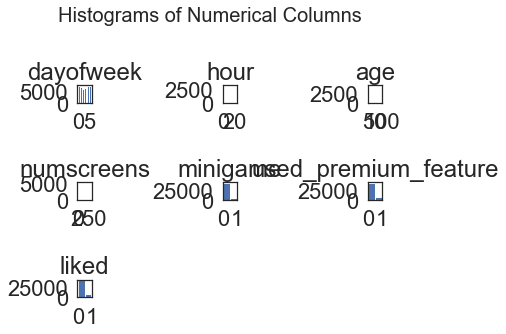

In [23]:
plt.suptitle('Histograms of Numerical Columns', fontsize = 20, y = 1.1)

for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])
    
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins = vals)
    plt.tight_layout()

Remarks:
- day of week has pretty even distribution, no particular day of week seem to have influence on if User install the app
- we have a substantial drop around 10 but note that those hours are in UTC format and the data are from US time zone so those hours are in reality in the middle of the night
- age seem to have even distribution apart from 2-3 jumps we have around 30, 40 and 52
- number of screens seem to be also evenly distributed apart from one outlier
- we may observe that not so many people played minigame, similar with using premium feature and liked/ not liked

## 4. CORRELATION WITH RESPONSE

We are going to use corrwith function which shows the correlation between all the fields in this dataframe with a list that we specify as an argument, in this case that would be 'enrolled':

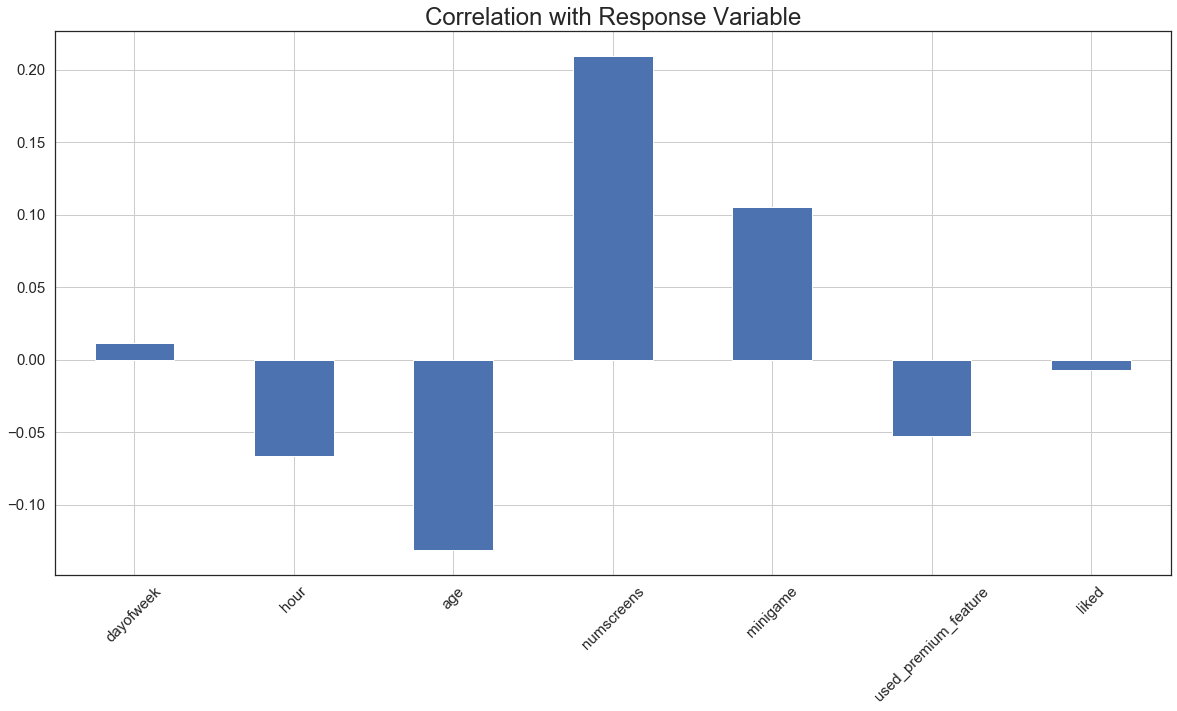

In [24]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20,10),
                                            title = 'Correlation with Response Variable',
                                            fontsize = 15, rot = 45,
                                            grid = True);

Remarks:
- day of the week seems to be correlated with the response variable meaning that the laster the day of the week, the more possible to enroll but this relation is very small
- the earlier it is, the smaller the age is, the more likely to enroll
- the more screens we saw, the more likely it is to enroll
- if we are likely to play a minigame, the more likely it is to enroll
- the more we used premium features, the less likely to enroll
- liked is not that strongly correlated with response variable

## 5. CORRELATION MATRIX

Now we are going to plot a correlation matrix between every individual field. Let's mask upper triangle of the matrix as it is symmetric:

(7.0, 0.0)

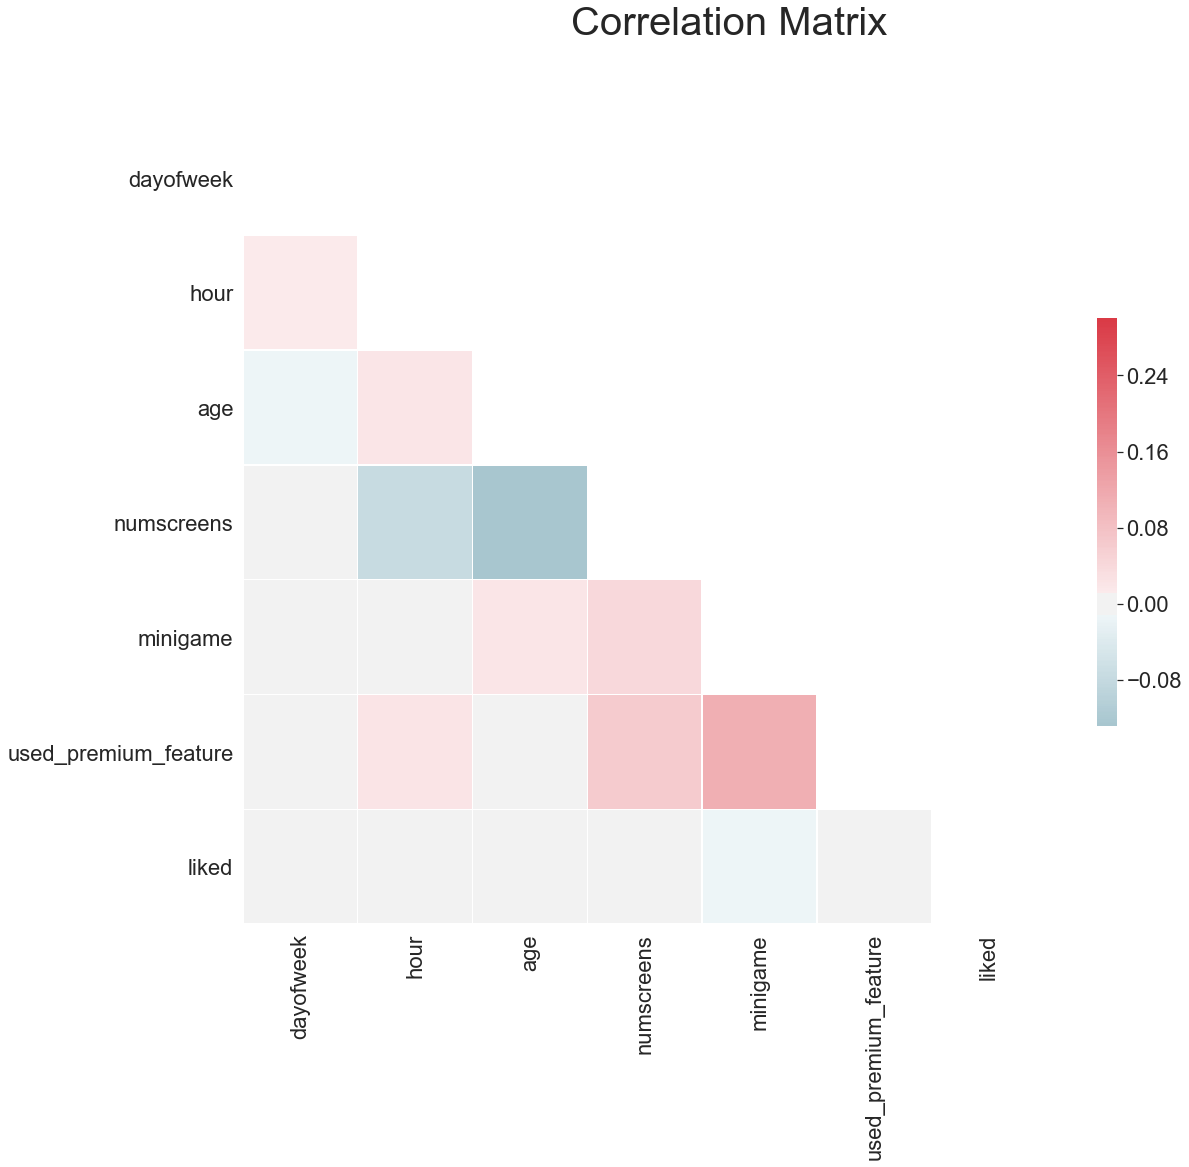

In [30]:
sns.set(style="white", font_scale=2)

corr = dataset2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": 0.5});
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Remarks:
- if colour between specific features is (almost) white, there is very little or no correlation between those features
- there is a positive correlation between those who played minigame and those who used premium features
- age and number of screens seem to be strongly correlated in a negative sense, i.e. the older the person is, the less number of screens he sees
- it doesn't seem there is a linear dependence between the features so we can conclude that the features are independent

## 6. FEATURE ENGINEERING

Feature engineering is the process of selecting and transforming variables when creating a predictive model using machine learning or statistical modeling.

Let's check first data types we have:

In [25]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [27]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [30]:
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]

In [31]:
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]

In [32]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [35]:
dataset['difference'] = (dataset['enrolled_date'] - dataset['first_open']).astype('timedelta64[h]')

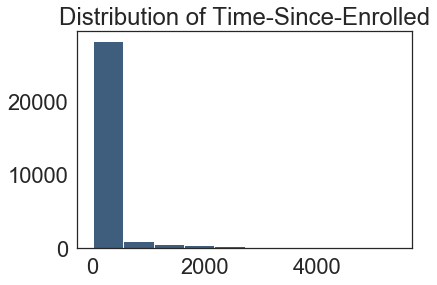

In [40]:
plt.hist(dataset['difference'].dropna(), color = '#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled')
plt.show;

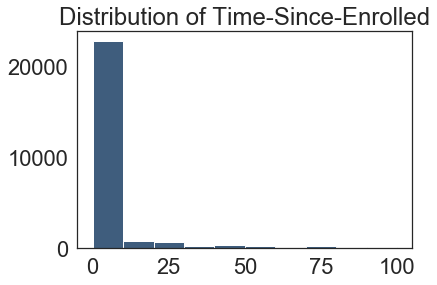

In [42]:
plt.hist(dataset['difference'].dropna(), color = '#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Enrolled')
plt.show;

In [43]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [44]:
dataset = dataset.drop(columns=['difference', 'enrolled_date', 'first_open'])

# 10. Formatting the screen_list Field